# Visualization of the simulation outputs

This document gives you some hints to generate diverse plots and visualize the outputs of each run. <br><br>
It is organized as follows:<br><br>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-the-data" data-toc-modified-id="Importing-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing the data</a></span></li><li><span><a href="#Scores" data-toc-modified-id="Scores-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Scores</a></span><ul class="toc-item"><li><span><a href="#Unstacked" data-toc-modified-id="Unstacked-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Unstacked</a></span></li><li><span><a href="#Stacked" data-toc-modified-id="Stacked-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Stacked</a></span></li></ul></li><li><span><a href="#Mode-choice" data-toc-modified-id="Mode-choice-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Mode choice</a></span><ul class="toc-item"><li><span><a href="#Overall-mode-choice" data-toc-modified-id="Overall-mode-choice-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Overall mode choice</a></span></li><li><span><a href="#Over-the-day" data-toc-modified-id="Over-the-day-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Over the day</a></span></li><li><span><a href="#By-demographic-group" data-toc-modified-id="By-demographic-group-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>By demographic group</a></span></li></ul></li><li><span><a href="#Accessibility" data-toc-modified-id="Accessibility-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Accessibility</a></span><ul class="toc-item"><li><span><a href="#Work-based-trips" data-toc-modified-id="Work-based-trips-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Work-based trips</a></span></li><li><span><a href="#Other-trips" data-toc-modified-id="Other-trips-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Other trips</a></span></li></ul></li><li><span><a href="#Level-of-service" data-toc-modified-id="Level-of-service-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Level of service</a></span><ul class="toc-item"><li><span><a href="#Travel-expenditure" data-toc-modified-id="Travel-expenditure-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Travel expenditure</a></span></li><li><span><a href="#Bus-crowding" data-toc-modified-id="Bus-crowding-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Bus crowding</a></span></li></ul></li><li><span><a href="#Congestion" data-toc-modified-id="Congestion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Congestion</a></span><ul class="toc-item"><li><span><a href="#Average-travel-time" data-toc-modified-id="Average-travel-time-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Average travel time</a></span></li><li><span><a href="#Delay" data-toc-modified-id="Delay-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Delay</a></span></li></ul></li><li><span><a href="#Costs-and-Benefits-of-Mass-Transit-Level-of-Service-Intervention" data-toc-modified-id="Costs-and-Benefits-of-Mass-Transit-Level-of-Service-Intervention-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Costs and Benefits of Mass Transit Level of Service Intervention</a></span><ul class="toc-item"><li><span><a href="#Operational-costs" data-toc-modified-id="Operational-costs-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Operational costs</a></span></li><li><span><a href="#Incentives-used" data-toc-modified-id="Incentives-used-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Incentives used</a></span></li><li><span><a href="#Revenue" data-toc-modified-id="Revenue-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Revenue</a></span></li></ul></li><li><span><a href="#Sustainability" data-toc-modified-id="Sustainability-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Sustainability</a></span></li></ul></div>

## Importing the data 

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import tqdm
from time import time
from lxml import etree
from data_parsing import extract_dataframe
import os
from os import path
import gzip
%load_ext autoreload
%autoreload 2
sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**TO-DO**: Insert the absolute links of the `sioux_faux-15k__warm-start` and `stats` folders.

In [28]:
# Define the path of the output folder 
beam_competitions_path = r"/Users/valentinegolfier/Documents/GitHub/BeamCompetitions"
warm_start_output_path = path.join(beam_competitions_path, 
                                   r"fixed-data/sioux_faux/bau/warm-start/sioux_faux-15k__warm-start/")
stats_output_path =path.join(beam_competitions_path, r"fixed-data/sioux_faux/bau/stats")

In [55]:
#SummaryStats
stats_data = path.join(stats_output_path, "summaryStats-15k.csv")

#Event file
event_data = path.join(warm_start_output_path, "outputEvents.xml.gz")

In [30]:
def unzip_file(path):
    if path.endswith('.gz'):
        return gzip.open(path)
    else:
        return path

## Scores

In [42]:
# Get data
scores_data = path.join(warm_start_output_path, "competition/submissionScores.csv")

### Unstacked

In [44]:
scores = pd.read_csv(scores_data) 
scores = scores.loc[:,["Component Name","Weighted Score"]]
scores["Component Name"] = scores["Component Name"].astype('category').cat.reorder_categories([ 
       'Submission Score',
       'Accessibility: Number of work locations accessible within 15 minutes',
       'Accessibility: Number of secondary locations accessible within 15 minutes',
       'Level of service: Average bus crowding experienced',
       'Level of service: average on-demand ride wait times',
       'Level of service: average trip expenditure - work',
       'Level of service: average trip expenditure - secondary',
       'Congestion: average vehicle delay per passenger trip',
       'Congestion: total vehicle miles traveled',
       'Mass transit level of service intervention: costs and benefits',
       'Sustainability: Total PM 2.5 Emissions'])

scores = scores.sort_values(by="Component Name")

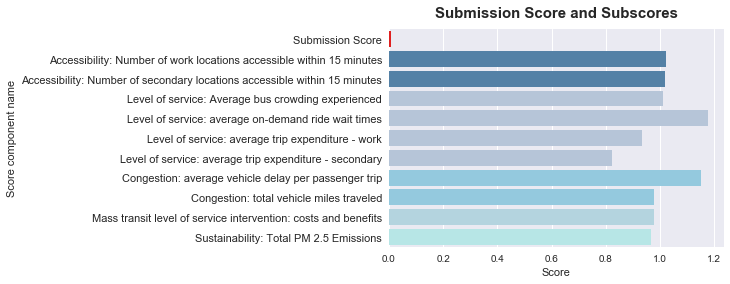

In [45]:
sns.barplot(x="Weighted Score", y="Component Name", data=scores, palette=['red','steelblue', 'steelblue','lightsteelblue',
                                                'lightsteelblue', 'lightsteelblue','lightsteelblue','skyblue','skyblue',
                                                                          'lightblue','paleturquoise' ])
plt.yticks(fontsize = 11)
plt.xlabel("Score")
plt.ylabel("Score component name")
plt.title("Submission Score and Subscores", fontweight = "bold", pad=12, fontsize = 15)
plt.show()

### Stacked

In [46]:
scores= pd.read_csv(scores_data) 
scores = scores.T
scores.columns=scores.iloc[0]
scores = scores.loc[["Weighted Score"],:]
scores = scores.drop(["Submission Score"], axis = 1)

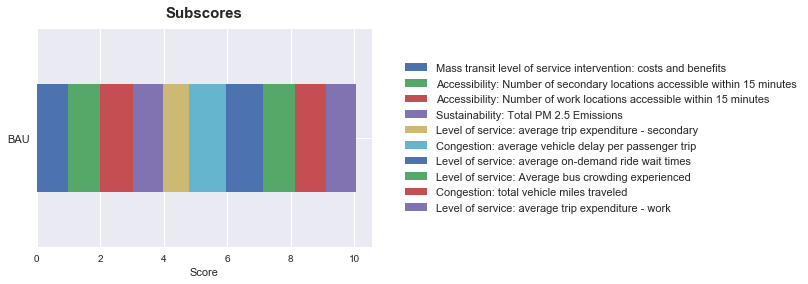

In [47]:
scores.plot.barh(stacked=True)
plt.legend(bbox_to_anchor=(1.01,1), loc="upper left")
plt.yticks([0],['BAU'],fontsize = 11 )
plt.xlabel("Score", fontsize = 11)
plt.legend(fontsize = 11, bbox_to_anchor=(2.3,0.5), loc="right")
plt.title("Subscores",fontweight = "bold", pad=12, fontsize = 15)
plt.show()

## Mode choice

In [48]:
# Get data
mode_choice_data = path.join(warm_start_output_path,"modeChoice.csv")
mode_choice_per_hour_data = path.join(warm_start_output_path,"ITERS/it.100/100.realizedMode.csv")

### Overall mode choice

In [49]:
mode_choice = pd.read_csv(mode_choice_data)
mode_choice = mode_choice.iloc[-1,:]
mode_choice = mode_choice.drop(["iterations"])

In [50]:
# Change ride-hail to on-demand ride in index
index_mode_choice = mode_choice.index.tolist()
idx = index_mode_choice.index('ride_hail')
index_mode_choice[idx] = 'on-demand ride'
mode_choice.index = index_mode_choice

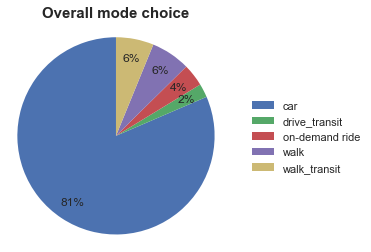

In [51]:
pie = mode_choice.plot(kind="pie", startangle=90, labels = None, autopct='%1.0f%%', pctdistance=0.8)
plt.axis("image")
labels = mode_choice.index.values
plt.legend(labels, bbox_to_anchor=(1.1,0.5), loc="center right", fontsize=11, bbox_transform=plt.gcf().transFigure)
plt.title("Overall mode choice", fontweight = "bold", fontsize=15, pad = 10)
plt.ylabel("")
plt.show()

### Over the day

In [52]:
mode_choice_per_hour = pd.read_csv(mode_choice_per_hour_data)
mode_choice_per_hour = mode_choice_per_hour.set_index("hours")

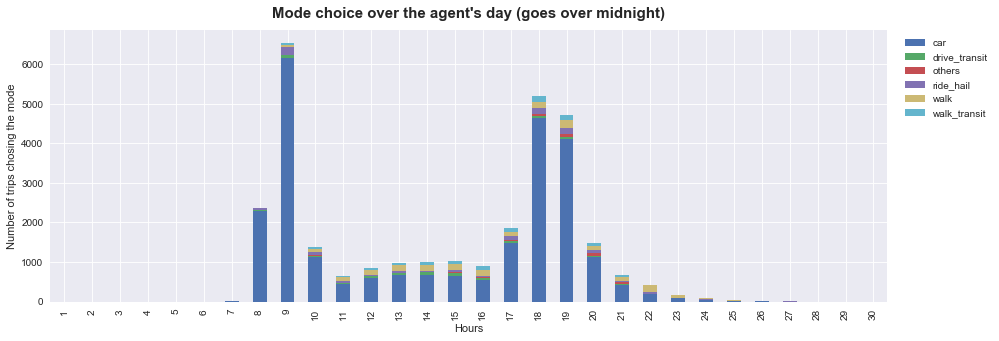

In [53]:
mode_choice_per_hour.plot.bar(stacked=True, figsize = (15,5))
plt.legend(bbox_to_anchor=(1.01,1), loc = "upper left")
plt.xlabel("Hours", fontsize=11)
plt.ylabel("Number of trips chosing the mode", fontsize=11)
plt.title("Mode choice over the agent's day (goes over midnight)", fontweight = "bold", fontsize=15, pad =12)
plt.grid(alpha=0.9)
plt.show()

### By demographic group

In [56]:
event_data = extract_dataframe(str(event_data))
event_data

,time,type,person,vehicle,driver,vehicleType,length,numPassengers,departureTime,arrivalTime,...,score,parkingType,pricingModel,chargingType,parkingTaz,distance,cost,locationX,locationY,departTime
0,0.0,PersonEntersVehicle,rideHailAgent-600-2014000947834-080395,rideHailVehicle-600-2014000947834-080395,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,PersonEntersVehicle,rideHailAgent-1803-2016000394530-0133521,rideHailVehicle-1803-2016000394530-0133521,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,PersonEntersVehicle,rideHailAgent-700-2015001479356-0123424,rideHailVehicle-700-2015001479356-0123424,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,PersonEntersVehicle,rideHailAgent-1101-2016001223046-1152024,rideHailVehicle-1101-2016001223046-1152024,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,PersonEntersVehicle,rideHailAgent-1803-2014001480009-091497,rideHailVehicle-1803-2014001480009-091497,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,PersonEntersVehicle,rideHailAgent-10104-2012000459447-19646,rideHailVehicle-10104-2012000459447-19646,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0,PersonEntersVehicle,rideHailAgent-1105-2013000921416-150587,rideHailVehicle-1105-2013000921416-150587,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
7,0.0,PersonEntersVehicle,rideHailAgent-1200-2014000147028-064814,rideHailVehicle-1200-2014000147028-064814,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
8,0.0,PersonEntersVehicle,rideHailAgent-10104-2012000719213-014044,rideHailVehicle-10104-2012000719213-014044,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
9,0.0,PersonEntersVehicle,rideHailAgent-1106-2012000198633-04004,rideHailVehicle-1106-2012000198633-04004,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
event_data.columns

Index(['time', 'type', 'person', 'vehicle', 'driver', 'vehicleType', 'length',
       'numPassengers', 'departureTime', 'arrivalTime', 'mode', 'links',
       'fuelType', 'fuel', 'capacity', 'startX', 'startY', 'endX', 'endY',
       'endLegFuelLevel', 'seatingCapacity', 'tollPaid', 'currentTourMode',
       'expectedMaximumUtility', 'location', 'availableAlternatives',
       'personalVehicleAvailable', 'tourIndex', 'link', 'actType', 'score',
       'parkingType', 'pricingModel', 'chargingType', 'parkingTaz', 'distance',
       'cost', 'locationX', 'locationY', 'departTime'],
      dtype='object')

In [61]:
event_data["type"].unique()

array(['PersonEntersVehicle', 'PathTraversal', 'ModeChoice', 'actend',
       'LeavingParkingEvent', 'ParkEvent', 'PersonLeavesVehicle',
       'actstart', 'ReserveRideHail', 'Replanning'], dtype=object)

In [62]:
event_data["numPassengers"].unique()

array([nan,  0.,  1.,  6.,  2.,  3.,  5.,  4.])

In [60]:
event_data["vehicleType"].unique()

array([None, 'BUS-DEFAULT', 'BODY-TYPE-DEFAULT', 'CAR-TYPE-DEFAULT'],
      dtype=object)

In [77]:
bus_events = event_data[event_data["vehicleType"]=="BUS-DEFAULT"]
bus_events.vehicle.unique()

array(['siouxareametro-sd-us:t_75366_b_219_tn_1',
       'siouxareametro-sd-us:t_60665_b_219_tn_0',
       'siouxareametro-sd-us:t_75348_b_219_tn_1',
       'siouxareametro-sd-us:t_75354_b_219_tn_1',
       'siouxareametro-sd-us:t_75372_b_219_tn_1',
       'siouxareametro-sd-us:t_75319_b_219_tn_1',
       'siouxareametro-sd-us:t_75380_b_219_tn_1',
       'siouxareametro-sd-us:t_75366_b_219_tn_2',
       'siouxareametro-sd-us:t_75329_b_219_tn_1',
       'siouxareametro-sd-us:t_501115_b_219_tn_0',
       'siouxareametro-sd-us:t_75335_b_219_tn_1',
       'siouxareametro-sd-us:t_501227_b_219_tn_0',
       'siouxareametro-sd-us:t_75324_b_219_tn_1',
       'siouxareametro-sd-us:t_75335_b_219_tn_2',
       'siouxareametro-sd-us:t_75380_b_219_tn_2',
       'siouxareametro-sd-us:t_501116_b_219_tn_0',
       'siouxareametro-sd-us:t_75348_b_219_tn_2',
       'siouxareametro-sd-us:t_75354_b_219_tn_2',
       'siouxareametro-sd-us:t_75329_b_219_tn_2',
       'siouxareametro-sd-us:t_501228_b_219_tn_

In [76]:
enters_veh_events = event_data[event_data["type"]=="PersonEntersVehicle"]
enters_veh_events

,time,type,person,vehicle,driver,vehicleType,length,numPassengers,departureTime,arrivalTime,...,score,parkingType,pricingModel,chargingType,parkingTaz,distance,cost,locationX,locationY,departTime
0,0.0,PersonEntersVehicle,rideHailAgent-600-2014000947834-080395,rideHailVehicle-600-2014000947834-080395,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,PersonEntersVehicle,rideHailAgent-1803-2016000394530-0133521,rideHailVehicle-1803-2016000394530-0133521,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,PersonEntersVehicle,rideHailAgent-700-2015001479356-0123424,rideHailVehicle-700-2015001479356-0123424,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,PersonEntersVehicle,rideHailAgent-1101-2016001223046-1152024,rideHailVehicle-1101-2016001223046-1152024,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,PersonEntersVehicle,rideHailAgent-1803-2014001480009-091497,rideHailVehicle-1803-2014001480009-091497,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,PersonEntersVehicle,rideHailAgent-10104-2012000459447-19646,rideHailVehicle-10104-2012000459447-19646,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0,PersonEntersVehicle,rideHailAgent-1105-2013000921416-150587,rideHailVehicle-1105-2013000921416-150587,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
7,0.0,PersonEntersVehicle,rideHailAgent-1200-2014000147028-064814,rideHailVehicle-1200-2014000147028-064814,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
8,0.0,PersonEntersVehicle,rideHailAgent-10104-2012000719213-014044,rideHailVehicle-10104-2012000719213-014044,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
9,0.0,PersonEntersVehicle,rideHailAgent-1106-2012000198633-04004,rideHailVehicle-1106-2012000198633-04004,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN


## Accessibility

### Work-based trips

### Other trips

## Level of service

### Travel expenditure

In [10]:
# Level of service
travel_expenditure_data = path.join(stats_output_path, "summaryStats-15k.csv")

In [19]:
travel_expenditure= pd.read_csv(travel_expenditure_data)
travel_expenditure = travel_expenditure.iloc[-1,:]
travel_expenditure

Iteration                                          1.000000e+02
agencyRevenue_217                                  7.515000e+02
agentHoursOnCrowdedTransit                         1.080083e+01
averageMTWaitingTimeInSec                          3.258500e+02
averageOnDemandRideWaitTimeInSec                   2.214924e+00
averageTripExpenditure                             1.213987e+00
averageTripExpenditure_Home                        5.873696e-01
averageTripExpenditure_Secondary                   8.116502e-01
averageTripExpenditure_Work                        4.703238e-01
averageVehicleDelayPerMotorizedLeg_home            2.058922e+03
averageVehicleDelayPerMotorizedLeg_secondary       1.947948e+03
averageVehicleDelayPerMotorizedLeg_work            1.660066e+03
averageVehicleDelayPerPassengerTrip                1.996511e+03
busCrowding                                        3.877218e+01
fuelConsumedInMJ_Diesel                            1.782224e+05
fuelConsumedInMJ_Food                   

In [ ]:
summary_stats = pd.read_csv("")

### Bus crowding

## Congestion

### Average travel time

In [11]:
# Congestion
travel_time_data = path.join(warm_start_output_path, "ITERS/it.100/100.averageTravelTimes.csv")

**BY MODE** 

In [575]:
travel_time = pd.read_csv(travel_time_data)
travel_time = travel_time.set_index("TravelTimeMode\Hour")
travel_time["mean"] = travel_time.mean(axis=1)
travel_time["mode"] = travel_time.index

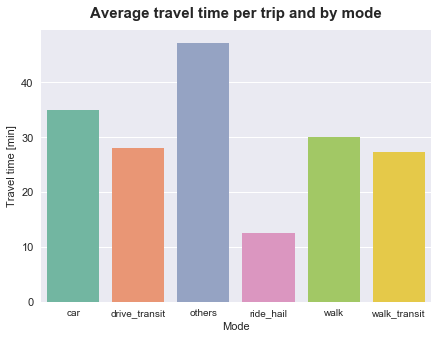

In [591]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(7,5)
sns.barplot(x = "mode", y = "mean", data=travel_time, palette = "Set2")
plt.yticks(fontsize = 11)
plt.xlabel("Mode")
plt.ylabel("Travel time [min]")
plt.title("Average travel time per trip and by mode", fontweight = "bold", pad=12, fontsize = 15)
plt.show()

**PIE**

In [557]:
travel_time = pd.read_csv(travel_time_data)
travel_time = travel_time.set_index("TravelTimeMode\Hour") 
travel_time = travel_time.mean(axis=1)
travel_time.values

array([34.96633953, 28.13049317, 47.21409827, 12.55685046, 30.01430912,
       27.27657256])

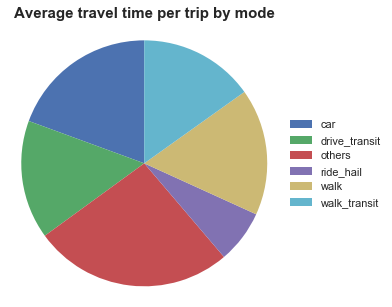

In [563]:
pie = travel_time.plot(kind="pie", startangle=90, labels = None, pctdistance=0.8, figsize=(5,5))
plt.axis("image")
labels = travel_time.index.values
plt.legend(labels, bbox_to_anchor=(1.4,0.5), loc="center right", fontsize=11)
plt.title("Average travel time per trip by mode", fontweight = "bold", fontsize=15, pad = 10)
plt.ylabel("")
plt.show()

**OVER THE DAY** 

In [472]:
travel_time = pd.read_csv(travel_time_data)
melted_travel_time = pd.melt(travel_time, id_vars="TravelTimeMode\Hour")
melted_travel_time.columns = ["mode", "hours", "travel time"]
melted_travel_time = melted_travel_time.sort_values(by = "hours")

In [479]:
melted_travel_time["hours"]= pd.to_numeric(melted_travel_time["hours"])
melted_travel_time.dtypes

mode            object
hours            int64
travel time    float64
dtype: object

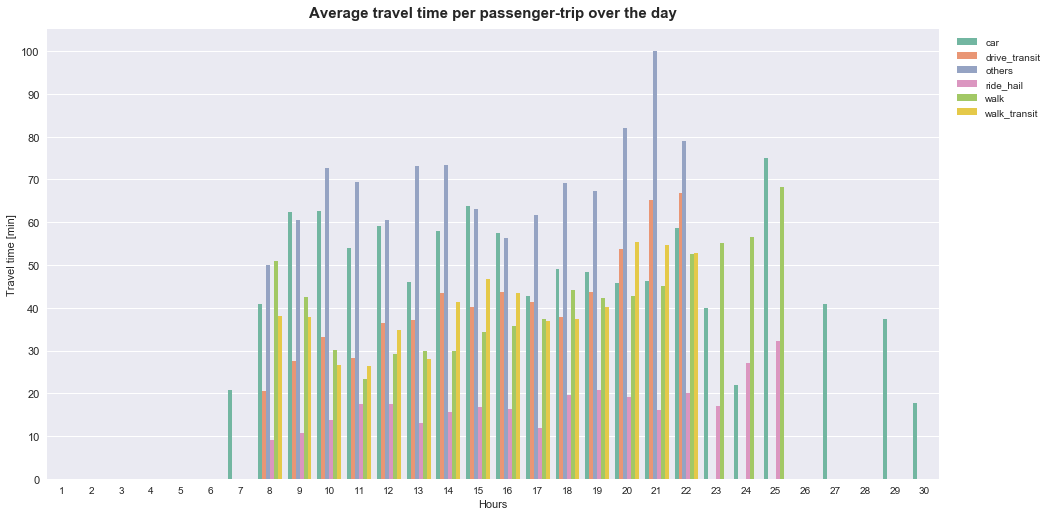

In [583]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(16, 8.27)
sns.barplot(ax = ax,x="hours", y="travel time", hue= "mode", data=melted_travel_time.sort_values(by = "hours"), palette = "Set2")
plt.legend(bbox_to_anchor=(1.01,1), loc = "upper left")
plt.xlabel("Hours", fontsize = 11)
plt.ylabel("Travel time [min]", fontsize = 11)
plt.title("Average travel time per passenger-trip over the day", fontweight = "bold", pad=12, fontsize = 15)
plt.yticks(np.arange(0,101,10),fontsize = 11)
plt.show()

### Delay

In [590]:
data = pd.read_csv(stats_data)
data = data.iloc[-1,:]
data

Iteration                                          1.000000e+02
agencyRevenue_217                                  5.197500e+02
agentHoursOnCrowdedTransit                         6.656111e+00
averageMTWaitingTimeInSec                          3.153333e+02
averageOnDemandRideWaitTimeInSec                   1.882345e+00
averageTripExpenditure                             5.646585e-01
averageTripExpenditure_Home                        6.653820e-01
averageTripExpenditure_Secondary                   9.880608e-01
averageTripExpenditure_Work                        5.046555e-01
averageVehicleDelayPerMotorizedLeg_home            1.500825e+03
averageVehicleDelayPerMotorizedLeg_secondary       1.990960e+03
averageVehicleDelayPerMotorizedLeg_work            1.944174e+03
averageVehicleDelayPerPassengerTrip                1.736145e+03
busCrowding                                        3.009585e+01
fuelConsumedInMJ_Diesel                            1.782224e+05
fuelConsumedInMJ_Food                   

## Costs and Benefits of Mass Transit Level of Service Intervention

### Operational costs

### Incentives used

### Revenue 

## Sustainability